# Module 09: *k*-Nearest Neighbors

**Student Name**: Savir Khanna

**Date**: 10/31/25

## Overview
The k-Nearest neighbor method is a type of instance based learning that uses existing data, with known labels, to predict the label for a new observation. The purpose of this exercise is to demonstrate the use of k-NN for classification using the [iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). 


## Instructions

#### Use the notebook: `k-NN.ipynb` to perform the following:
Question 1. Load and Inspect the data

Question 2. Perform the k-nn analysis using different values of k. Recommend which value is more appropriate and justify your response.

Question 3. Evaluate the prediction accuracy of the k-nn model.

Question 4. Explore different metrics and data partitioning strategies.


### Submission Instructions

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## Question 1: Inspect the data
In this question you will need to load the data (this was performed for you), inspect the distribution and pairwise relationships between the features. 

In [2]:
#load the data from sklearn.datasets
data = load_iris()

#divide the data into the input 'X' and the labels 'y'
X = data['data'] #the observations
y = data['target'] #the label

In [4]:
#load the data in a pandas dataframe
df = pd.DataFrame(X, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
df['class'] = [data['target_names'][idx] for idx in y]

df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Question 1.1 (5 pts)
Obtain a statistical summary of the iris flowers sepal and petal features. Use the statistical summary, explain your observation about the iris flowers. Note: You can use the `describe()` function to display the statistical summary.

In [6]:
round(df.describe(), 2)

,sepal length,sepal width,petal length,petal width
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


A sepal is the green stemish part of a flower that encloses a petal, and we can see it has a mean length of 5.84 and mean width of 3.06. The standard deviations of 0.83 and 0.44 suggest a normal distribution, further supported by the median being 5.8 very close to the mean. The range of sepal length is only 3.6, highlighting how compact and accurate this dataset is. Many of these same principles can be applied to petal length and width, with a low range of 5.90 and 2.4 respectively.

### Question 1.2 (10 pts)
Visualize and discuss the **distribution of each feature** and the **pairwise relationships between features**. Note: Ensure that you discuss the strength of the **correlation** between the features.

- Tip 1: the seaborn library has a pairplot visualization which is useful to display both the distribution of each feature and pairwise relationships.
- Tip 2: another useful visualization is called a correlation matrix. It can be used to visually display the strength of the correlation. 

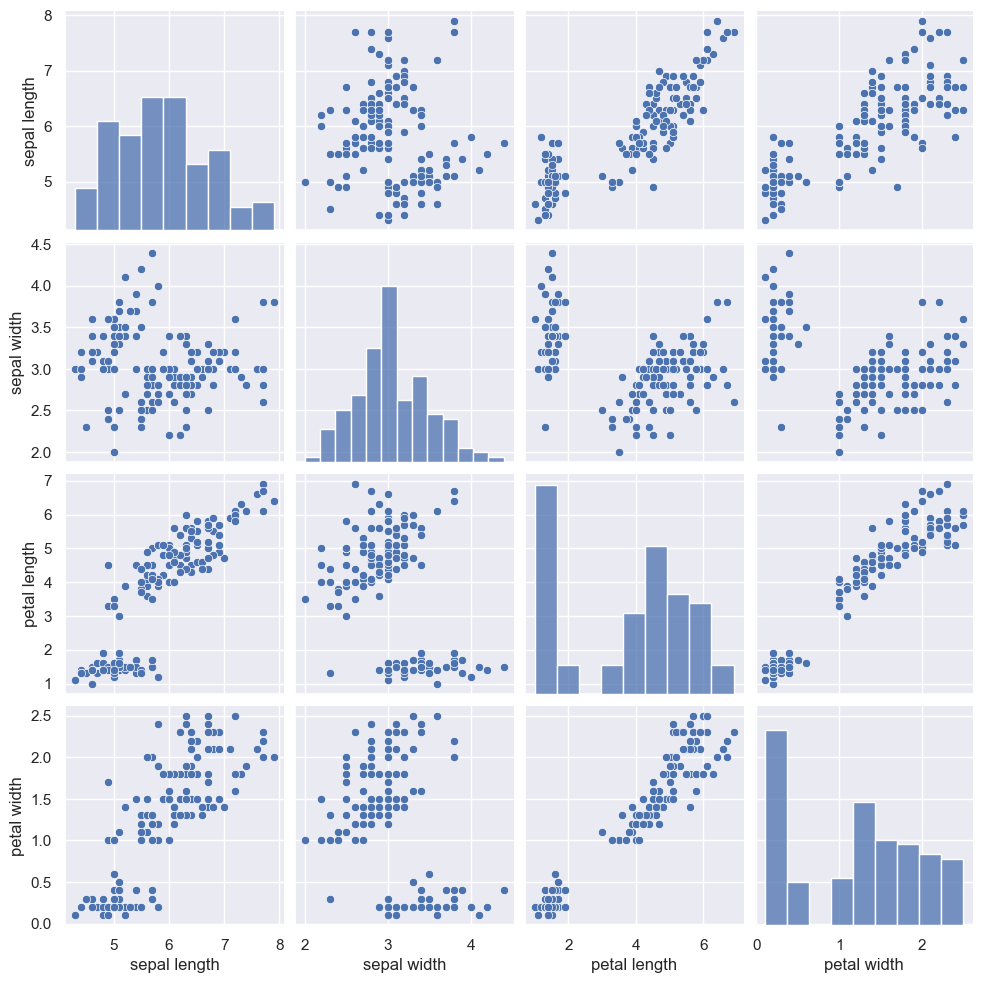

In [63]:
sns.pairplot(df)

### Distribution of Sepal statistics
As alluded to before in the previous question. sepal width shows a clearly almost normal distribution. Sepal length additionally follows this trend with a slightly more rounded and less steep middle of the normal distribution. If we look at the pairwise plots for the features between sepal width and length, the relationship is slightly negative, but relatively random distribution, implying no variability based on the other variable.

### Distribution of Petal Statistics
The petal length and width vary drastically form the sepal, having a lidghtly skewed to thr right distribution for both. The mode is clearly to the left with diminishing values as the petal width and length get larger. In terms of these two varibales correlation to each other, the distribution seems extremely strong and positive, with a clear increase in the dependent variable (whichever graph you look at can be length or width) when the independent variable increases.

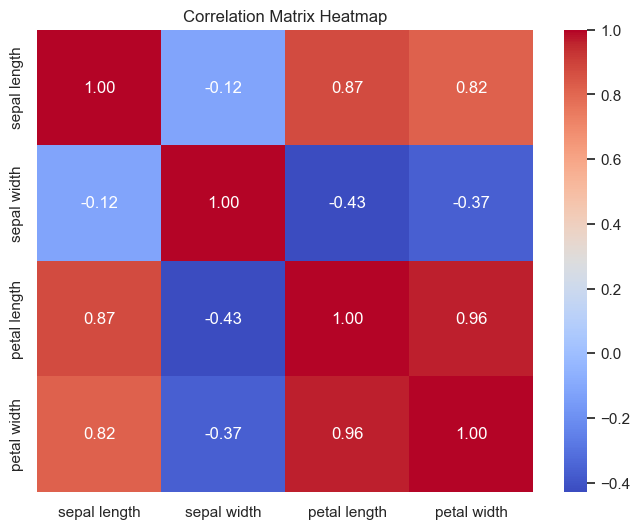

In [64]:
# heatmap of correlation matrix of the elements in df
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

### Pairwise correlation of Sepal and Petal
After discovering the initial distribution of petal and sepal lengths and widths, I decided to create a matrix heatmap for a better understanding of the relationships between variables. My initial assumptions were correction being that sepal width and sepal length have no, or very dlightly negative correlation

In terms of comparing sepal length with petal length, there is a strong positive correlation, along with sepal length and petal width. This functionally makes sense because the sepal supports the petal, and must grow to hold it in. Interestingly though, we find sepal width having a negative correlation with the petal statistics. After some research on Iris flowers (Wikipedia data provided) this is a biological characteristic of the Iris setosa and doesn't hold true for all flowers.

## Question 2: Choose *K* (25 pts)

Using the cell below, build a model to predict the target in the iris dataset using the k-NN algorithm. The program should try at least 20 different values of k and evaluate the accuracy of the predictions. After which, display a line graph showing the accuracy for each value of k. Evaluate the results from the graph and recommend the best value of *k*. 

`Note:` If multiple values of *k* are found to be suitable, weigh the pros and cons of choosing a large versus a small value of *k*.

<Axes: xlabel='sepal length', ylabel='sepal width'>

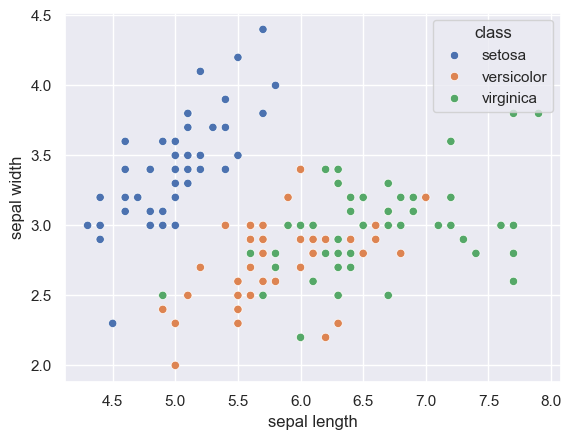

In [65]:
sns.scatterplot(x=df['sepal length'], y=df['sepal width'], hue=df['class'])

In [77]:
from matplotlib.ticker import MaxNLocator

Model Accuracy: 0.95
Model Accuracy: 0.95
Model Accuracy: 0.97
Model Accuracy: 0.95
Model Accuracy: 0.97
Model Accuracy: 0.97
Model Accuracy: 0.97
Model Accuracy: 0.97
Model Accuracy: 0.97
Model Accuracy: 0.97
Model Accuracy: 0.97
Model Accuracy: 0.97
Model Accuracy: 0.97
Model Accuracy: 0.97
Model Accuracy: 0.97
Model Accuracy: 0.97
Model Accuracy: 0.97
Model Accuracy: 0.95
Model Accuracy: 0.95
Model Accuracy: 0.95
Model Accuracy: 0.95
Model Accuracy: 0.92
Model Accuracy: 0.95
Model Accuracy: 0.92
Model Accuracy: 0.92
Model Accuracy: 0.92


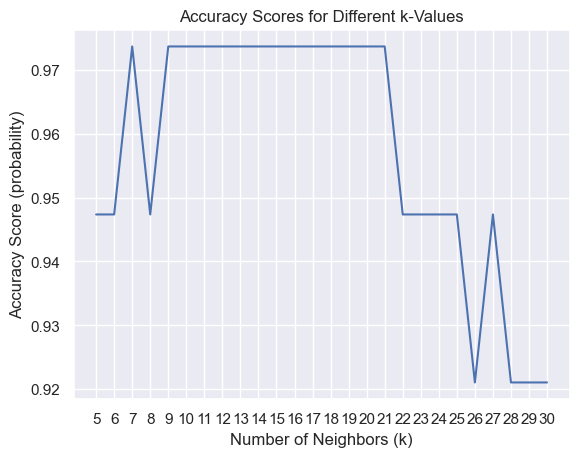

In [78]:
#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

#build the k-nn model, experiment with different values of k and plot the results
k_vals = [i for i in range(5, 31)]
accuracy_scores = []
for k in k_vals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"Model Accuracy: {accuracy:.2f}")
    
plt.plot(k_vals, accuracy_scores)

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy Score (probability)")
plt.title("Accuracy Scores for Different k-Values")

plt.xticks(k_vals)

plt.show()

### Accuracy Score per k-value
I tested around 30 k-values with varying accuracy scores based on the number of neighbors. Interestingly, the number of neighbors caused the accuracy to spike around 15 neighbor point. But as the number significantly increases, the accuracy drops precipitously and flattens out in the late twenties. This suggests the fact that less neighbors give a slightly more accurate assessment since looking at too many neighbors many muddle the responses with some outliers in other categories. It's also important to note this dataset is just really accurate in general, so the difference can be mariginal at time.

## Question 3: Evaluate the Results (5 pts)
Display the classification report for your recommended value of k. Evaluate the report and explain the results. 

In [79]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.82      1.00      0.90        14
           2       1.00      0.75      0.86        12

    accuracy                           0.92        38
   macro avg       0.94      0.92      0.92        38
weighted avg       0.93      0.92      0.92        38



### Classification report Analysis
The precision for the model of knn clusters was 1, signifying no false positives and the maximum of true positives. This means setosa and viriginica had no false positives at all. Recall, was also 1 for the first two metrics, with the 3rd only being 0.75. Therefore only 75% of virginica samples were actually found. Finally for the f1-score, setosa had the highest f1-score of 100 with the precison and recall being 100. For the virginica and versicolor it was slightly lower at 90 and 86 percent respectively.

## Question 4: Model Evaluation (5 pts)
Answer the following question using a markdown cell.

1. Research the difference between accuracy, precision, and recall. For each metric, provide an example that explains when you would choose one metric over the others.
2. In the lecture we discussed one method to partition your dataset using a train-test split. Identify another approach that can be used to partition your dataset and explain how it works.

`Note``: you do not need to implement code for questions 4.1 and 4.2

### Accuracy:
Overall correctness of the model and how close the predicted values were to the real values. Accuracy is important is almost any scenario, especially when comparing model predictions to real values are important. 
### Precision:
Number of predicted positives were correct, so amount of true positives divided by predicted ones. Precision is very useful when you believe that false positive are extremely costly and need to ensure maximum true positives.
### Recall:
How many positives were actually identified out of all the actual positives. Similar to precision, useful when false negatives are costly and need to max true positives. 

Another method can used to partition your dataset would be cross-validation and provides a more robust approach to partitioning. Divided into different equal-sized subsets, containing k samples. For each fold, we use as a test set and use k-1 folds as the training set. After that, you would train the model same as before, and aggregate performance across k iterations. It has some advantages, namely using all the test data and reducing the variance over traintestsplit. 

## Resources / References
Share any resources that were helpful in your response for question 4. 

https://scikit-learn.org/stable/modules/cross_validation.html